In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'D:\bigdata2\mydata\mydata\heart.csv') #### ไม่ต้องกำหนด path เพราะไฟล์ข้อมูลอยู่ในโฟลเดอร์เดียวกัน 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [293]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum().head(6)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
dtype: int64

In [294]:
df.isnull().sum().head()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
dtype: int64

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
 y = df.iloc[:, -1].values

In [17]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
#คำสั่่ง iloc ใช้สำหรับแบ่งข้อมูล 
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values

In [23]:
#การแบ่งข้อมูลสำหรับ train และ test โมเดล ดังนี้ 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)


In [27]:
#การสร้างโมเดล Decision Tree เพื่อใช้ในการพยากรณ์
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict.reshape(-1,1)


array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

การแสดงไดอะแกรม Decision Tree วิธีที่ 1

[Text(0.45754716981132076, 0.95, 'x[2] <= 0.5\ngini = 0.5\nsamples = 820\nvalue = [408, 412]'),
 Text(0.2358490566037736, 0.85, 'x[11] <= 0.5\ngini = 0.366\nsamples = 406\nvalue = [308, 98]'),
 Text(0.3466981132075472, 0.8999999999999999, 'True  '),
 Text(0.14150943396226415, 0.75, 'x[12] <= 2.5\ngini = 0.498\nsamples = 179\nvalue = [95.0, 84.0]'),
 Text(0.07547169811320754, 0.65, 'x[8] <= 0.5\ngini = 0.407\nsamples = 102\nvalue = [29, 73]'),
 Text(0.03773584905660377, 0.55, 'x[7] <= 96.5\ngini = 0.195\nsamples = 64\nvalue = [7, 57]'),
 Text(0.018867924528301886, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.05660377358490566, 0.45, 'x[4] <= 316.5\ngini = 0.095\nsamples = 60\nvalue = [3, 57]'),
 Text(0.03773584905660377, 0.35, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(0.07547169811320754, 0.35, 'x[4] <= 362.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.05660377358490566, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.09433962264150944, 0.25, 'gi

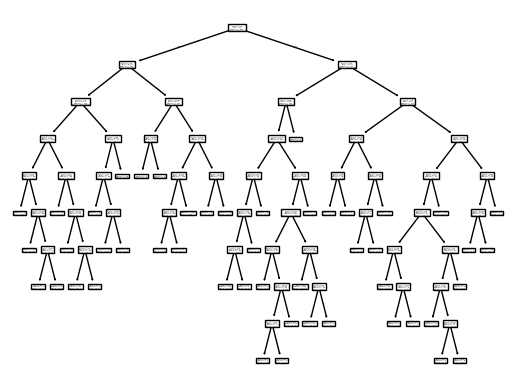

In [28]:
tree.plot_tree(model)

In [29]:
#การป้อนข้อมูลพยากรณ์
pred = [[52,1,0,125,212,0,1,168,0,1.0,2,2,3],
         [59,1,1,140,221,0,1,164,1,0.0,2,0,2],
         [53,1,0,140,203,1,0,155,1,3.1,0,0,3],
         [50,0,0,110,254,0,0,159,0,0.0,2,0,2]]
         
pred1 = model.predict(pred)

i = 1
for m in range(len(pred1)):
    print('%d' %i, pred1[m])
    i += 1

1 0
2 1
3 0
4 1


In [30]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [31]:
#การกรอกข้อมูลเพื่อพยากรณ์โมเดลโรคหัวใจ

age = float(input("Enter age: "))
sex = float(input("Enter sex: "))
cp = float(input("Enter cp: "))
trestbps = float(input("Enter trestbps: "))
chol = float(input("Enter chol: "))
fbs = float(input("Enter fbs: "))
restecg = float(input("Enter restecg: "))
thalach = float(input("Enter thalach: "))
exang = float(input("Enter exang: "))
oldpeak = float(input("Enter oldpeak: "))
slope = float(input("Enter slope: "))
ca = float(input("Enter ca: "))
thal = float(input("Enter thal: "))

In [35]:
result = model.predict([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
print("การตรวจโรคหัวใจพบว่ามีค่าเป็น:", result, "(0 = ปกติ ไม่เป็นโรคหัวใจ, 1 = เป็นโรคหัวใจ)")

การตรวจโรคหัวใจพบว่ามีค่าเป็น: [0] (0 = ปกติ ไม่เป็นโรคหัวใจ, 1 = เป็นโรคหัวใจ)


In [36]:
#การบันทึกเก็บโมเดลไปใช้งานบนระบบดิจิทัล
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'heart_model.pkl')
model = joblib.load('heart_model.pkl')

การประเมินโมเดลด้วย confusion matrix ว่ามีความแม่นยำกี่เปอร์เซ็นต์ (%)

In [37]:
y_targets = df['target'].unique()
y_targets

array([0, 1], dtype=int64)

confusion_matrix
 [[ 91   0]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       114

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



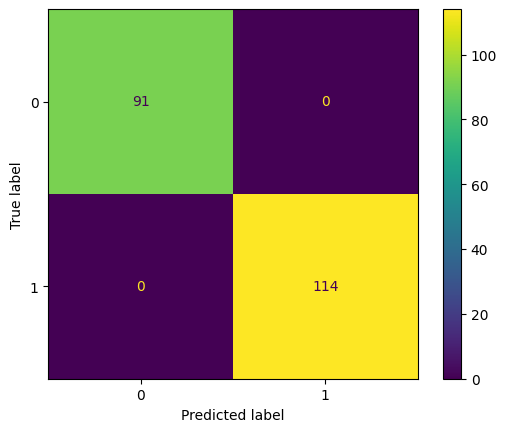

In [38]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#การประเมินโมเดลที่เป็นตาราง
confusion_matrix = confusion_matrix(y_test, y_predict)
print("confusion_matrix\n", confusion_matrix)
print(classification_report(y_test, y_predict))

#การประเมินโมเดลที่เป็นรูปสี
# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

การสร้างไดอะแกรม Decision Tree วิธีที่ 2

In [40]:
df = pd.read_csv(r'D:\bigdata2\mydata\mydata\heart.csv') #### ไม่ต้องกำหนด path เพราะไฟล์ข้อมูลอยู่ในโฟลเดอร์เดียวกัน 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [41]:
# #Label Encoding: การแปลงตัวอักษรให้เป็นตัวเลข
# class_names, y = np.unique(df['Outcome'], return_inverse=True)
# class_names
# y

# import numpy as np
# df['Outcome'] = np.where(df['Outcome']==0, 'No', 'Yes')

#การแปลง class 0 และ 1 ให้เป็นตัวหนังสือ ตัวแปร dummy คือ 0 = Normal และ 1 = HeartDisease 
target_map = {0: 'Normal', 1: 'HeartDisease'}
df['target'] = df['target'].map(target_map)
# df.sample(5,random_state=1)

target_names = df['target'].unique()
target_names


array(['Normal', 'HeartDisease'], dtype=object)

In [42]:
#ตรวจสอบดูว่ามีกี่ featurs/คอลัมน์
# data_feature_names = df.iloc[:, :-1]
# data_feature_names

#กำหนด features/คอลัมน์
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
feature_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

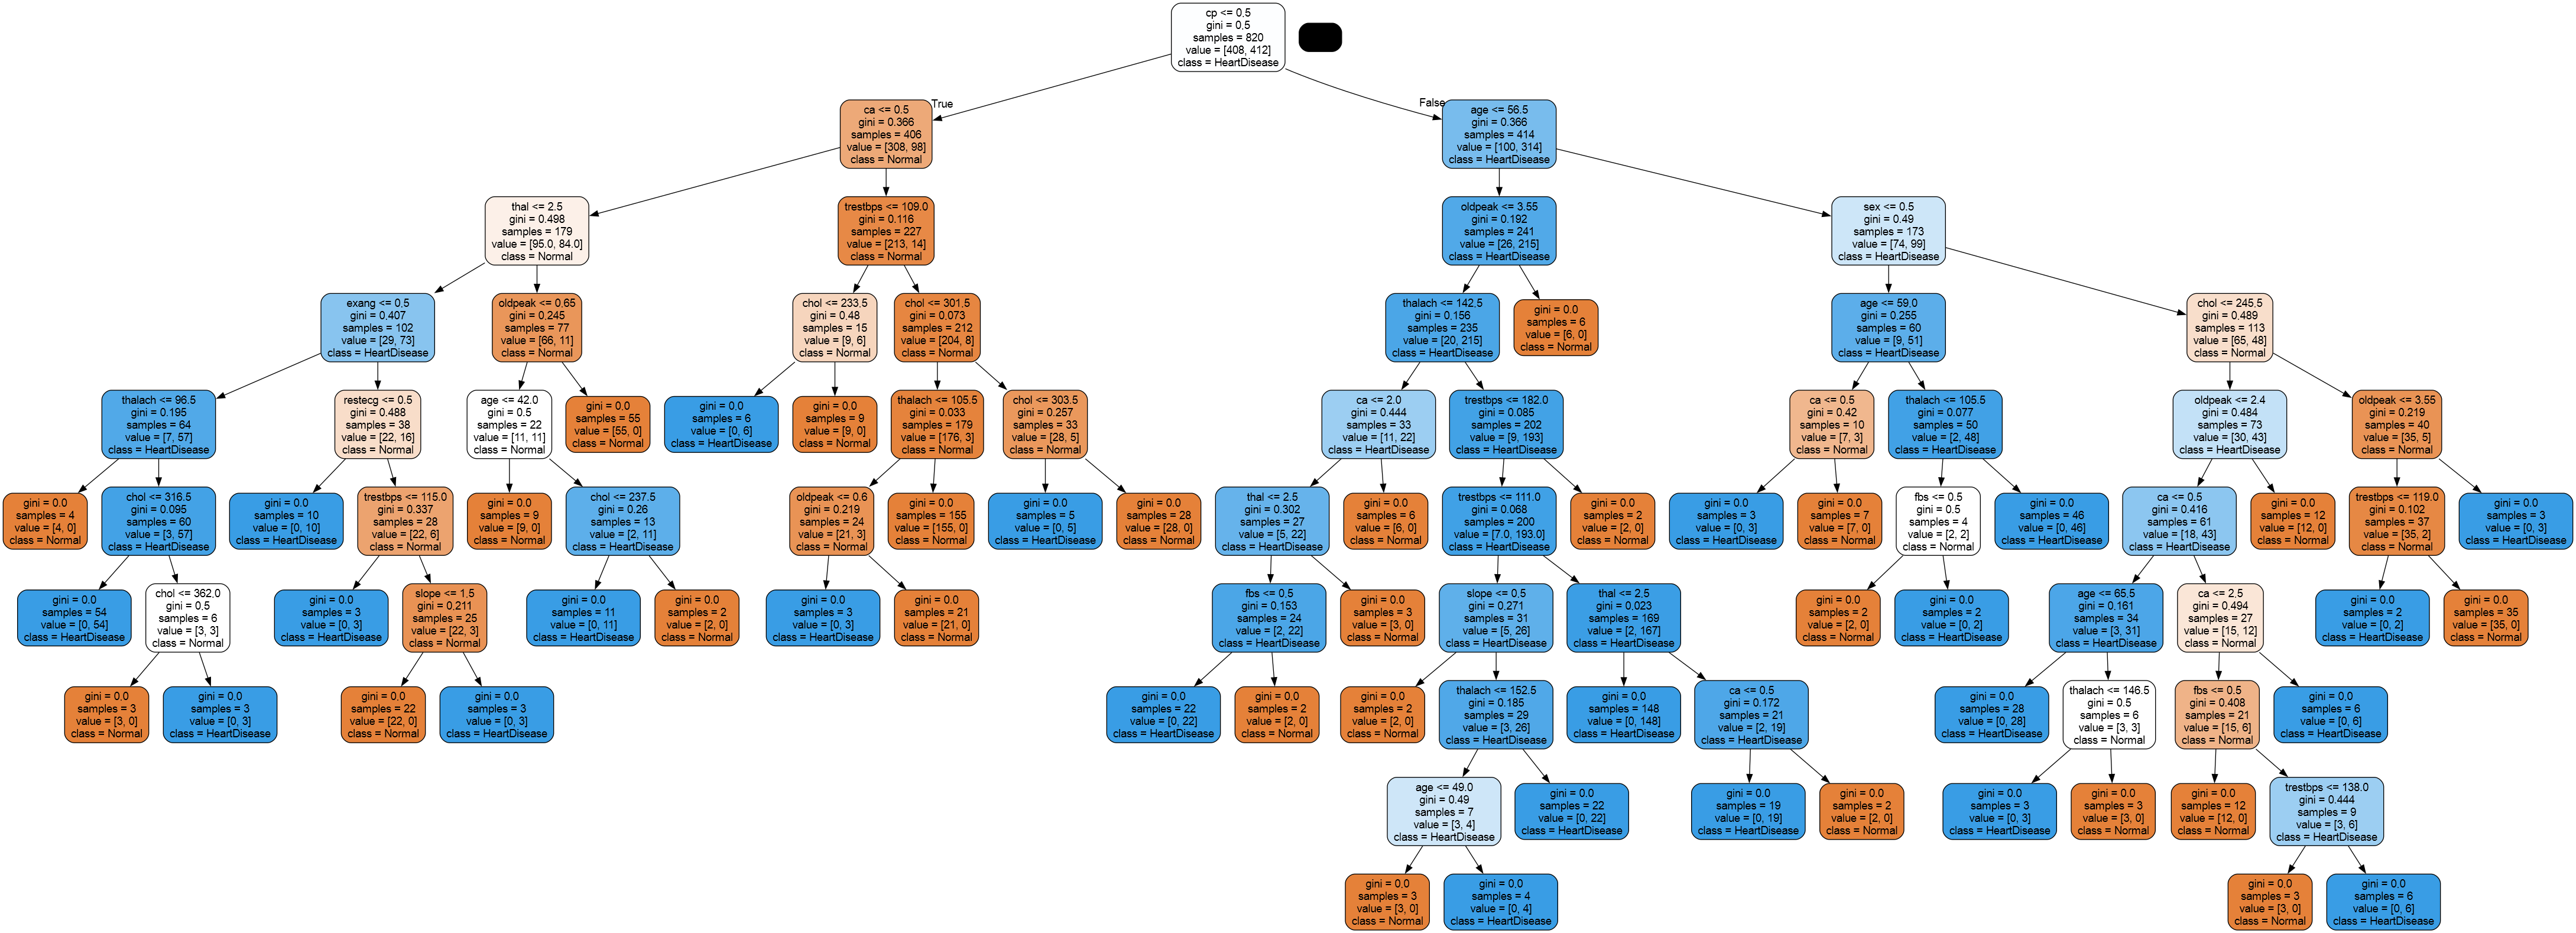

In [43]:
#pip install pydotplus
#conda install python-graphviz
#pip install graphviz
#import graphviz

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                        feature_names=feature_names, 
                        class_names=target_names, filled=True, 
                        rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

การประเมินโมเดลด้วย confusion matrix ว่ามีความแม่นยำกี่เปอร์เซ็นต์ (%)

In [44]:
y_targets = df['target'].unique()
y_targets

array(['Normal', 'HeartDisease'], dtype=object)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
print(classification_report(y_test, y_predict, target_names=y_targets))
cm = confusion_matrix(y_test, y_predict)
print(cm)

#pip install scikit-plot
import scikitplot as skplot 
plt.rcParams['figure.figsize'] = 8,8 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

Accuracy Score: 1.00
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        91
HeartDisease       1.00      1.00      1.00       114

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[ 91   0]
 [  0 114]]


ImportError: cannot import name 'interp' from 'scipy' (c:\Users\COM000\anaconda3\envs\data-webapp\Lib\site-packages\scipy\__init__.py)